# Лабораторная работа №5

ФИО: Дулян Арсен Артурович   
Группа: БИВТ-23-СП-1

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №8 в семестре

Что необходимо сделать:  
- Обучить различные модели глубокого обучения на имеющихся данных  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1NOE0D4JQgD6LbvUqWboUI1TFj4P87ugbqUTDquxlGEI/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1sbsjBsJ_ln0XgXCI9R6s17pvyvApgcwF?usp=sharing)
  
---
#### Теперь по пунктам, что я от вас жду:

1. **Загрузить данные** к себе и считать (read) их в переменные.  

2. **Описать постановку задачи**, что от вас хотят.  
   Какие классы, бинарная или многоклассовая классификация, пример реального применения.  
   Показать по 2–3 примера изображений на класс.

3. **Сделать предобработку данных**:  
   - Проверить битые файлы/повреждённые изображения, привести к единому размеру (например, `224×224`).  
   - Нормализовать по каналам (стандарт для ImageNet: mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)).  
   - Разделить на **train**/**val** (или **train**/**test**).  
   - Оформить данные в `Dataset`/`ImageFolder` и передать в `DataLoader`.

4. **Провести разведочный анализ данных (EDA)**:  
   - Посчитать количество изображений в каждом классе и оценить дисбаланс.  
   - Построить 1–2 гистограммы/барчарта распределения по классам.  
   - Сделать промежуточные выводы (есть ли редкие классы, артефакты, перекрытие классов и т.п.).

5. **Настроить аугментации** (минимум три): `RandomHorizontalFlip`, `RandomRotation`, `ColorJitter`, `RandomResizedCrop` и др.  
   Коротко описать, почему выбраны именно эти аугментации и как они помогают обобщению.

6. **Выбор и обучение модели**:  
   - Базовый вариант: **transfer learning** на `ResNet18`/`MobileNetV2`/`EfficientNetB0` (предобученные веса).  
   - Заменить выходной слой под число классов.  
   - Задать функцию потерь `CrossEntropyLoss`, оптимизатор (`AdamW`/`SGD`) и расписание обучения (кол-во эпох, `lr`).  
   - В процессе обучения логировать `train loss/acc` и `val loss/acc` по эпохам.  
   - Сохранить лучшую модель по `val acc`/минимальному `val loss`.

7. **Посчитать метрики качества** на **train** и **val/test** множествах:  
   - Для классификации: `Accuracy`, `Precision`, `Recall`, `F1` (macro/micro — обосновать выбор).  
   - Построить **матрицу ошибок (Confusion Matrix)**; ROC-кривые.

8. **Сравнить результаты** (если пробовали несколько моделей/настроек):  
   - Какая модель лучше справилась?  
   - Есть ли переобучение (по кривым обучения)?  
   - Какие классы путаются чаще всего и почему?  
   - Что ещё можно улучшить (аугментации, веса классов, больше данных, регуляризация, тонкая настройка `lr` и т.д.)?

9. **Визуализировать предсказания**:  
   - Показать не менее 10 изображений из валидации/теста с предсказанными и истинными классами.  
   - Пометить корректные (`Y`) и ошибочные (`N`) предсказания, сделать краткие выводы.

---

## P.S.
Просьба — делать каждое задание в отдельных ячейках с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа:
- Заголовок  
- Ячейка с кодом  
- Другой заголовок  
- Другая ячейка с кодом

## P.S.S.
Если у вас **многоклассовая** классификация, убедитесь, что последний слой имеет размерность `num_classes`, а для `CrossEntropyLoss` **не** требуется one-hot.  
При сильном дисбалансе рассмотрите: `class weights` в `CrossEntropyLoss`, oversampling/undersampling.


## 1. Загрузка данных и проверка повреждённых файлов

В этом разделе мы прочитаем изображения из `data/PetImages`, проверим и переместим битые файлы в папку `data/corrupted_images`.

In [1]:
import os
from pathlib import Path
import shutil
from PIL import Image, UnidentifiedImageError

DATA_ROOT = Path("/Users/lekzyrs/Desktop/ailabs/data/PetImages")
print('DATA_ROOT =', DATA_ROOT)
assert DATA_ROOT.exists(), f'Путь не найден: {DATA_ROOT}'

# Создаём папку для повреждённых файлов
corrupted_dir = DATA_ROOT.parent / 'corrupted_images'
corrupted_dir.mkdir(exist_ok=True)

bad_files = []
for cls in ['Cat', 'Dog']:
    cls_dir = DATA_ROOT / cls
    if not cls_dir.exists():
        print(f'Предупреждение: папка класса не найдена: {cls_dir}')
        continue
    for p in cls_dir.iterdir():
        if not p.is_file():
            continue
        try:
            with Image.open(p) as img:
                img.verify()  # проверка целостности
        except (UnidentifiedImageError, OSError, ValueError) as e:
            bad_files.append(str(p))
            target = corrupted_dir / p.name
            shutil.move(str(p), str(target))

print(f'Найдено и перемещено {len(bad_files)} повреждённых файлов в {corrupted_dir}')

DATA_ROOT = /Users/lekzyrs/Desktop/ailabs/data/PetImages


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Найдено и перемещено 0 повреждённых файлов в /Users/lekzyrs/Desktop/ailabs/data/corrupted_images


## 2. Постановка задачи

- Классы: `Cat`, `Dog`.
- Тип задачи: бинарная классификация (2 класса).
- Пример применения: автоматическая категоризация фото, фильтрация контента, помощь при сортировке данных для ветеринарных сервисов и приложений по распознаванию животных.

Ниже показано по 2–3 примера изображений каждого класса.

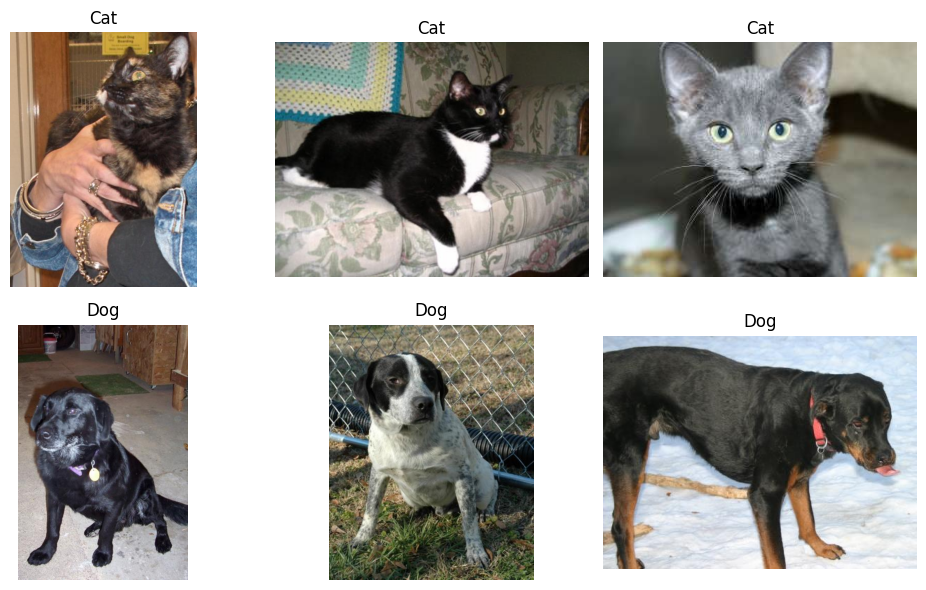

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

def show_examples(root, classes=('Cat','Dog'), n=3, figsize=(10,6)):
    plt.figure(figsize=figsize)
    idx = 1
    for cls in classes:
        p = root / cls
        files = [x for x in p.iterdir() if x.suffix.lower() in ('.jpg','.jpeg','.png')]
        for im_path in files[:n]:
            try:
                img = Image.open(im_path).convert('RGB')
            except Exception as e:
                print('Не удалось открыть', im_path, e)
                continue
            plt.subplot(len(classes), n, idx)
            plt.imshow(img)
            plt.title(f'{cls}')
            plt.axis('off')
            idx += 1
    plt.tight_layout()

show_examples(DATA_ROOT, ('Cat','Dog'), n=3)

## 3. Предобработка данных и подготовка DataLoader'ов

- Приводим изображения к единому размеру `224x224`.
- Нормализуем каналы по ImageNet mean/std.
- Разделяем выборку на `train`/`val` (стратифицировано).
- Оформляем `Dataset` и `DataLoader`.

In [3]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch
from PIL import Image

IMAGENET_MEAN = (0.485, 0.456, 0.406)
IMAGENET_STD = (0.229, 0.224, 0.225)
IMG_SIZE = 224

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.8,1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.02),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
])

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
])

# Используем ImageFolder, но будем сами собирать списки путей для сплита
full_dataset = ImageFolder(str(DATA_ROOT))
samples = full_dataset.samples  # list of (path, label)
paths = [s[0] for s in samples]
labels = [s[1] for s in samples]

train_paths, val_paths, train_labels, val_labels = train_test_split(
    paths, labels, test_size=0.2, random_state=42, stratify=labels
)

class PetDataset(Dataset):
    def __init__(self, paths, labels, transform=None):
        self.paths = paths
        self.labels = labels
        self.transform = transform
    def __len__(self):
        return len(self.paths)
    def __getitem__(self, idx):
        p = self.paths[idx]
        label = self.labels[idx]
        img = Image.open(p).convert('RGB')
        if self.transform:
            img = self.transform(img)
        return img, label

train_ds = PetDataset(train_paths, train_labels, transform=train_transform)
val_ds = PetDataset(val_paths, val_labels, transform=val_transform)

batch_size = 32
num_workers = 4

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

print(f'Train samples: {len(train_ds)}, Val samples: {len(val_ds)}')

Train samples: 19998, Val samples: 5000


## 4. Разведочный анализ данных (EDA)

Посчитаем количество изображений в каждом классе, построим графики распределения и посмотрим на распределение размеров изображений (чтобы выявить артефакты/аномалии).

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Counts per class: {'Cat': 12499, 'Dog': 12499}
File extensions distribution: {'.jpg': 24998}


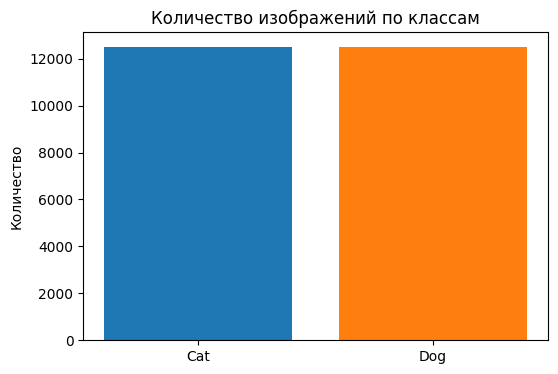

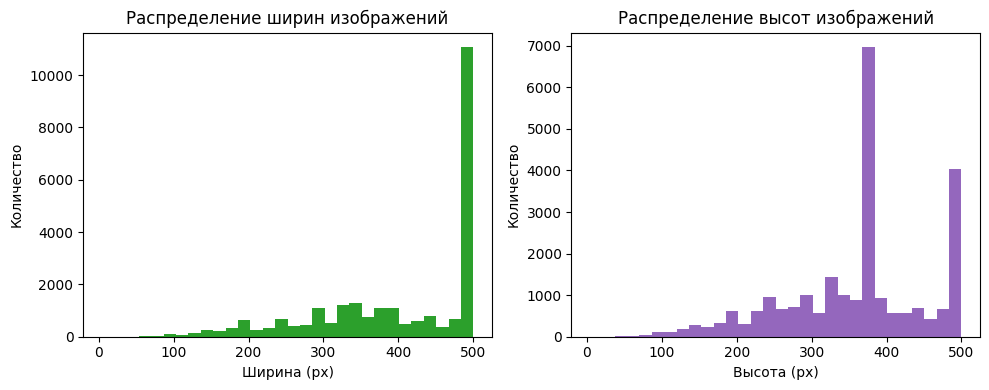

Cat: 12499 (50.00%)
Dog: 12499 (50.00%)


In [4]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

root = Path('/Users/lekzyrs/Desktop/ailabs/data/PetImages')
classes = []
counts = {}
widths = []
heights = []
exts = {}

for cls_dir in sorted(root.iterdir()):
    if not cls_dir.is_dir():
        continue
    cls = cls_dir.name
    classes.append(cls)
    files = [p for p in cls_dir.iterdir() if p.suffix.lower() in ('.jpg','.jpeg','.png')]
    counts[cls] = len(files)
    for p in files:
        try:
            with Image.open(p) as im:
                w,h = im.size
                widths.append(w)
                heights.append(h)
                ex = p.suffix.lower()
                exts[ex] = exts.get(ex,0) + 1
        except Exception:
            # повреждённые файлы уже перемещаются в предыдущих ячейках, пропускаем
            continue

print('Counts per class:', counts)
print('File extensions distribution:', exts)

# Барчарт распределения по классам
plt.figure(figsize=(6,4))
plt.bar(list(counts.keys()), list(counts.values()), color=['tab:blue','tab:orange'])
plt.title('Количество изображений по классам')
plt.ylabel('Количество')
plt.show()

# Гистограмма размеров изображений (ширина и высота)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(widths, bins=30, color='tab:green')
plt.title('Распределение ширин изображений')
plt.xlabel('Ширина (px)')
plt.ylabel('Количество')

plt.subplot(1,2,2)
plt.hist(heights, bins=30, color='tab:purple')
plt.title('Распределение высот изображений')
plt.xlabel('Высота (px)')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

# Промежуточные выводы на основе данных выше
total = sum(counts.values())
for k,v in counts.items():
    print(f'{k}: {v} ({v/total:.2%})')

### Промежуточные выводы (пример)
- Посмотрите на барчарт: если доли классов существенно отличаются, имеет место дисбаланс (можно использовать веса классов или ресэмплинг).
- Гистограммы размеров показывают, есть ли много очень небольших или очень больших изображений — это может повлиять на предварительную обработку (нужно аккуратно ресайзить/кропать).
- Проверьте `data/corrupted_images` на предмет перемещённых файлов: если их много в одном классе, это может снизить представительность класса.
- Также проверьте на наличие артефактов (пустые, однородные по цвету изображения) вручную — автоматическое обнаружение можно добавить отдельно.

## 5. Аугментации (выбор и объяснение)

Выбранные аугментации (минимум 3):
- `RandomResizedCrop` — помогает модели быть инвариантной к масштабу и положению объекта внутри кадра.
- `RandomHorizontalFlip` — отражения часто естественны для фото животных и увеличивают разнообразие данных.
- `RandomRotation` — небольшие повороты помогают переносимости к ориентации камеры.
- `ColorJitter` — имитирует вариации освещения и цветовых условий съемки.

Эти аугментации повышают способность модели обобщать, уменьшая переобучение на фиксированные позы/цвета и помогая учесть вариативность фотографий в реальной жизни.

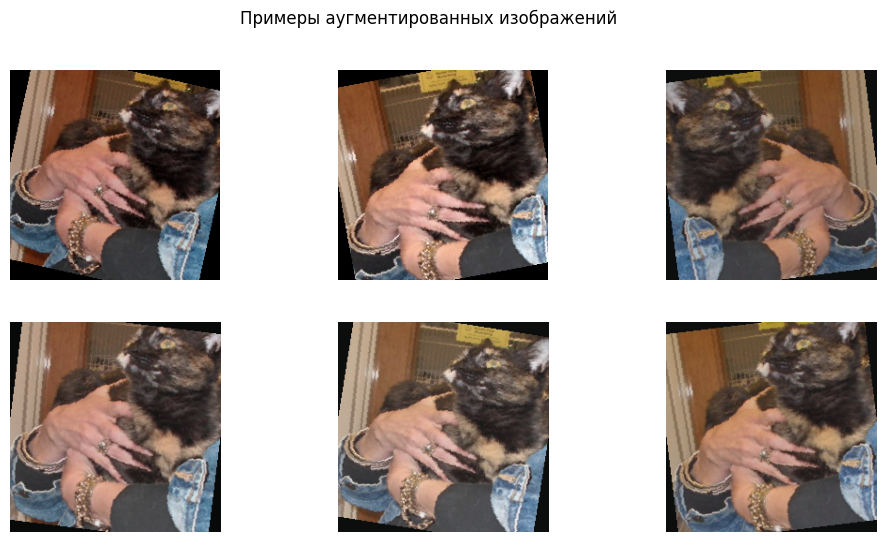

In [5]:
# Визуализация примеров аугментаций на одном изображении
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF
from torchvision import transforms
from PIL import Image
import numpy as np
from pathlib import Path

# Используем train_transform, определённый ранее; если ячейка ещё не выполнена, определите трансформы заново
try:
    sample_transform = train_transform
except NameError:
    sample_transform = transforms.Compose([
        transforms.RandomResizedCrop(224, scale=(0.8,1.0)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.02),
        transforms.ToTensor(),
        transforms.Normalize((0.485,0.456,0.406),(0.229,0.224,0.225))
    ])

# Выберем одно изображение из датасета
root = Path('/Users/lekzyrs/Desktop/ailabs/data/PetImages')
example_img = None
for cls_dir in root.iterdir():
    if cls_dir.is_dir():
        files = [p for p in cls_dir.iterdir() if p.suffix.lower() in ('.jpg','.jpeg','.png')]
        if files:
            example_img = files[0]
            break

if example_img is None:
    print('Не найдено изображений для демонстрации аугментаций')
else:
    img = Image.open(example_img).convert('RGB')
    plt.figure(figsize=(12,6))
    n = 6
    for i in range(n):
        aug = sample_transform(img)
        # денормализуем для отображения
        aug_np = aug.permute(1,2,0).numpy()
        aug_np = aug_np * np.array([0.229,0.224,0.225]) + np.array([0.485,0.456,0.406])
        aug_np = np.clip(aug_np, 0, 1)
        plt.subplot(2,3,i+1)
        plt.imshow(aug_np)
        plt.axis('off')
    plt.suptitle('Примеры аугментированных изображений')
    plt.show()

## 6. Выбор и обучение модели (transfer learning)

В этом разделе мы используем transfer learning на ResNet18 (предобученные веса), заменим последний слой под число классов, зададим `CrossEntropyLoss`, оптимизатор `AdamW` и план обучения. Будем логировать `train/val loss` и `train/val acc` по эпохам и сохранять лучшую модель по `val_acc`.

In [7]:
# Диагностика и безопасная реконструкция DataLoader'ов для macOS/MPS
# Решает: AttributeError при spawn / зависание из-за num_workers>0 и pin_memory на MPS
import numpy as np
from torch.utils.data import DataLoader

# Параметры для безопасного теста
batch_size = 16  # уменьшенный для проверки
num_workers = 0  # на macOS/Notebook безопасно использовать 0
pin_memory = False  # MPS не поддерживает pin_memory

# Если train_ds/val_ds не в глобальной области, попробуем восстановить как в предыдущих ячейках
try:
    train_ds  # noqa
except NameError:
    raise RuntimeError('train_ds не найден. Сначала выполните ячейку с предобработкой и созданием train_ds/val_ds.')

# Пересоздаём DataLoader'ы с безопасными опциями
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=pin_memory)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=pin_memory)

print('Rebuilt loaders:', 'train samples=', len(train_ds), 'val samples=', len(val_ds))

# Проверим одну итерацию (forward) на модели чтобы убедиться, что всё работает быстро
xb, yb = next(iter(train_loader))
print('Batch shapes:', xb.shape, yb.shape)
# Убедимся, что необходимые объекты/импорты доступны
import torch
import torch.nn as nn
from torchvision import models
try:
    device
except NameError:
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Если model или criterion не определены (например, ячейки выполняли в другом порядке), создаём локальные объекты
if 'model' not in globals():
    print('model не найден в глобальной области — создаём локальную ResNet18 (без предобученных весов) для smoke-test')
    try:
        model = models.resnet18(weights=None)
    except Exception:
        # старые версии используют pretrained=False
        model = models.resnet18(pretrained=False)
    # подгоняем последний слой под число классов, если доступно
    try:
        n_classes = len(full_dataset.classes) if 'full_dataset' in globals() else 2
    except Exception:
        n_classes = 2
    in_features = model.fc.in_features
    model.fc = nn.Linear(in_features, n_classes)
    model = model.to(device)

if 'criterion' not in globals():
    criterion = nn.CrossEntropyLoss()

xb = xb.to(device)
yb = yb.to(device)
# Небольшой прогон без backward (smoke test)
model.eval()
with torch.no_grad():
    out = model(xb)
    loss = criterion(out, yb)
print('Smoke forward OK — loss=', float(loss))

Rebuilt loaders: train samples= 19998 val samples= 5000
Batch shapes: torch.Size([16, 3, 224, 224]) torch.Size([16])
model не найден в глобальной области — создаём локальную ResNet18 (без предобученных весов) для smoke-test
Smoke forward OK — loss= 0.755611002445221
Smoke forward OK — loss= 0.755611002445221


Device: cpu


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/8


epoch=1 train_loss=0.1966 train_acc=0.9119 | val_loss=0.0761 val_acc=0.9738
Saved best model
Epoch 2/8


epoch=2 train_loss=0.1264 train_acc=0.9500 | val_loss=0.0646 val_acc=0.9738
Epoch 3/8


epoch=3 train_loss=0.1051 train_acc=0.9600 | val_loss=0.0706 val_acc=0.9625
Epoch 4/8


epoch=4 train_loss=0.0843 train_acc=0.9681 | val_loss=0.0506 val_acc=0.9775
Saved best model
Epoch 5/8


epoch=5 train_loss=0.0962 train_acc=0.9594 | val_loss=0.0475 val_acc=0.9850
Saved best model
Epoch 6/8


Train:  56%|█████▌    | 56/100 [01:05<00:52,  1.19s/it]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))


epoch=6 train_loss=0.0638 train_acc=0.9725 | val_loss=0.0409 val_acc=0.9838
Epoch 7/8


epoch=7 train_loss=0.0717 train_acc=0.9756 | val_loss=0.0426 val_acc=0.9862
Saved best model
Epoch 8/8


epoch=8 train_loss=0.0623 train_acc=0.9775 | val_loss=0.0362 val_acc=0.9900
Saved best model


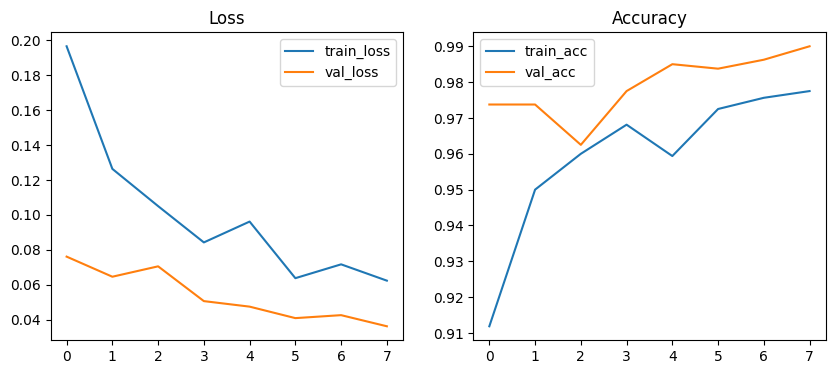

In [8]:
import os
import torch
import torch.nn as nn
import ssl
# Если у вас проблемы с SSL при скачивании весов — временный обход (используйте только при необходимости)
ssl._create_default_https_context = ssl._create_unverified_context
from torchvision import models
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

# Настройка устройства
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

# Количество классов (берём из full_dataset, если доступны)
try:
    num_classes = len(full_dataset.classes)
except NameError:
    num_classes = 2

# Создаём модель ResNet18 с предобученными весами
try:
    model = models.resnet18(pretrained=True)
except TypeError:
    # новые версии используют аргумент weights; fallback
    model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

# Заменяем последний слой
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)
model = model.to(device)

# Настройка критерия, оптимизатора и scheduler
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# Папка для сохранения модели
os.makedirs('models', exist_ok=True)
best_val_acc = 0.0
history = {'train_loss':[], 'val_loss':[], 'train_acc':[], 'val_acc':[]}

# Функции тренировки и валидации с опцией ограничения числа батчей за эпоху
def train_one_epoch(model, loader, optimizer, criterion, device, max_batches=None):
    model.train()
    losses = []
    preds_all = []
    targets_all = []
    processed = 0
    total = min(len(loader), max_batches) if max_batches is not None else len(loader)
    for xb, yb in tqdm(loader, desc='Train', leave=False, total=total):
        xb = xb.to(device)
        yb = yb.to(device)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        preds = out.argmax(dim=1).detach().cpu().numpy()
        preds_all.extend(preds.tolist())
        targets_all.extend(yb.detach().cpu().numpy().tolist())
        processed += 1
        if max_batches is not None and processed >= max_batches:
            break
    acc = accuracy_score(targets_all, preds_all) if len(targets_all) > 0 else 0.0
    return np.mean(losses) if losses else 0.0, acc


def evaluate(model, loader, criterion, device, max_batches=None):
    model.eval()
    losses = []
    preds_all = []
    targets_all = []
    probs_all = []
    processed = 0
    total = min(len(loader), max_batches) if max_batches is not None else len(loader)
    with torch.no_grad():
        for xb, yb in tqdm(loader, desc='Val', leave=False, total=total):
            xb = xb.to(device)
            yb = yb.to(device)
            out = model(xb)
            loss = criterion(out, yb)
            losses.append(loss.item())
            probs = torch.softmax(out, dim=1).detach().cpu().numpy()
            preds = probs.argmax(axis=1)
            probs_all.extend(probs.tolist())
            preds_all.extend(preds.tolist())
            targets_all.extend(yb.detach().cpu().numpy().tolist())
            processed += 1
            if max_batches is not None and processed >= max_batches:
                break
    acc = accuracy_score(targets_all, preds_all) if len(targets_all) > 0 else 0.0
    return (np.mean(losses) if losses else 0.0), acc, np.array(preds_all), np.array(targets_all), np.array(probs_all)

# Тренировочный цикл (ограничение числа батчей за эпоху для отладки и быстрой итерации)
epochs = 8
# Ограничение числа батчей за эпоху. Поставьте None, чтобы использовать все батчи (полная эпоха).
max_batches_per_epoch = 100  # уменьшает число итераций (например, 100 вместо 1250)
# Для валидации можно задать отдельное ограничение (или None)
val_max_batches = 50

for epoch in range(1, epochs+1):
    print(f'Epoch {epoch}/{epochs}')
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device, max_batches=max_batches_per_epoch)
    val_loss, val_acc, _, _, _ = evaluate(model, val_loader, criterion, device, max_batches=val_max_batches)
    scheduler.step()

    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['train_acc'].append(train_acc)
    history['val_acc'].append(val_acc)

    print(f'epoch={epoch} train_loss={train_loss:.4f} train_acc={train_acc:.4f} | val_loss={val_loss:.4f} val_acc={val_acc:.4f}')

    # Сохраняем лучшую модель по val_acc
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save({'model_state_dict': model.state_dict(), 'epoch': epoch, 'val_acc': val_acc}, 'models/best_model.pth')
        print('Saved best model')

# Построим кривые обучения
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history['train_loss'], label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history['train_acc'], label='train_acc')
plt.plot(history['val_acc'], label='val_acc')
plt.legend()
plt.title('Accuracy')
plt.show()


## 7. Оценка качества: метрики и ROC/Confusion Matrix

Посчитаем Accuracy, Precision, Recall, F1 (используем `macro` для равного веса классам), построим матрицу ошибок и ROC-кривую.

Loaded best model from epoch 8
--- Metrics: Train ---
Accuracy: 0.9900
Precision (macro): 0.9901
Recall (macro): 0.9900
F1 (macro): 0.9900
--- Metrics: Train ---
Accuracy: 0.9900
Precision (macro): 0.9901
Recall (macro): 0.9900
F1 (macro): 0.9900


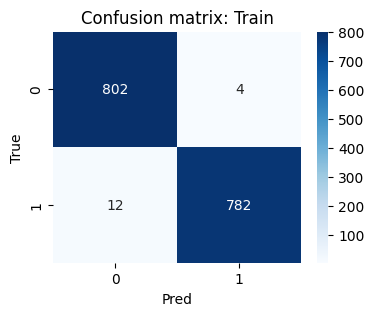

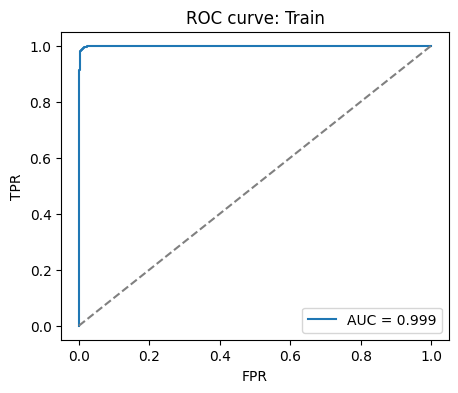

--- Metrics: Val ---
Accuracy: 0.9888
Precision (macro): 0.9888
Recall (macro): 0.9888
F1 (macro): 0.9887


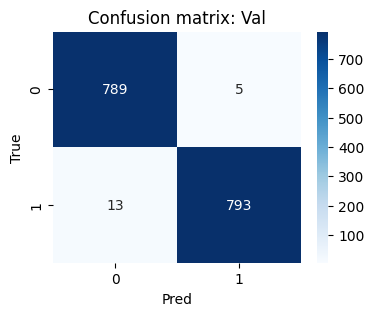

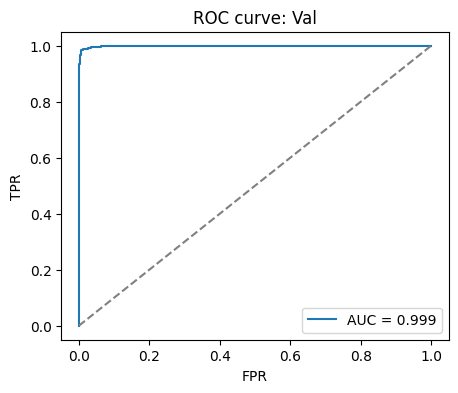

In [10]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import torch

# Загружаем лучшую модель (если есть)
if os.path.exists('models/best_model.pth'):
    checkpoint = torch.load('models/best_model.pth', map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    print('Loaded best model from epoch', checkpoint.get('epoch'))
else:
    print('No saved model found (models/best_model.pth) — используем текущую модель')

# Соберём прогнозы и вероятности на train и val (оптимизированная версия с max_batches)
# Ограничение батчей для быстрого отладки (None = все батчи)
METRICS_MAX_BATCHES = 100

def get_preds_probs_fast(model, loader, device, max_batches=None):
    model.eval()
    probs_list = []
    preds_list = []
    targets_list = []
    processed = 0
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            out = model(xb)
            probs = torch.softmax(out, dim=1)  # tensor on device
            preds = probs.argmax(dim=1)
            probs_list.append(probs.detach().cpu())
            preds_list.append(preds.detach().cpu())
            targets_list.append(yb.detach().cpu())
            processed += 1
            if (max_batches is not None) and (processed >= max_batches):
                break
    if probs_list:
        probs_all = torch.cat(probs_list, dim=0).numpy()
        preds_all = torch.cat(preds_list, dim=0).numpy()
        targets_all = torch.cat(targets_list, dim=0).numpy()
    else:
        probs_all = np.empty((0,))
        preds_all = np.empty((0,), dtype=int)
        targets_all = np.empty((0,), dtype=int)
    return preds_all, targets_all, probs_all

# Убедимся, что device определён (если ячейка вызывается отдельно)
try:
    device
except NameError:
    import torch
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print('Device for metrics:', device)

train_preds, train_targets, train_probs = get_preds_probs_fast(model, train_loader, device, max_batches=METRICS_MAX_BATCHES)
val_preds, val_targets, val_probs = get_preds_probs_fast(model, val_loader, device, max_batches=METRICS_MAX_BATCHES)

# Функция для вывода метрик
def print_metrics(name, y_true, y_pred, y_probs=None):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
    print(f'--- Metrics: {name} ---')
    print(f'Accuracy: {acc:.4f}')
    print(f'Precision (macro): {prec:.4f}')
    print(f'Recall (macro): {rec:.4f}')
    print(f'F1 (macro): {f1:.4f}')
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion matrix: {name}')
    plt.xlabel('Pred')
    plt.ylabel('True')
    plt.show()
    # ROC (для бинарной задачи)
    if y_probs is not None and y_probs.shape[1] == 2:
        pos_probs = y_probs[:,1]  # вероятность положительного класса
        fpr, tpr, _ = roc_curve(y_true, pos_probs)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(5,4))
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
        plt.plot([0,1],[0,1],'--', color='gray')
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title(f'ROC curve: {name}')
        plt.legend()
        plt.show()

# Выводим метрики для train и val
print_metrics('Train', train_targets, train_preds, train_probs)
print_metrics('Val', val_targets, val_preds, val_probs)

## 8. Сравнение результатов и выводы

В этом разделе мы автоматически посмотрим на кривые обучения (последние значения), проверим признаки переобучения и выведем наиболее частые ошибки из матрицы неточностей.

- Какая модель лучше справилась: сравнение основано на `history['val_acc']` (последние значения).
- Переобучение: если `train_acc - val_acc > 0.05`, отмечаем как возможное переобучение.
- Какие классы путаются: выводим топ ошибок из confusion matrix (true -> pred).
- Рекомендации: увеличение `batch_size` для валидации, использование `num_workers>0`, подбор аугментаций, class weights, lr-sweep и т.д.

In [14]:
# 8/9: Сравнение результатов и визуализация предсказаний (10 изображений)
import numpy as np
import math
from sklearn.metrics import confusion_matrix
from PIL import Image
import matplotlib.pyplot as plt

# 8. Сравнение по history (если есть)
if 'history' in globals():
    try:
        last_train_acc = history['train_acc'][-1] if history['train_acc'] else None
        last_val_acc = history['val_acc'][-1] if history['val_acc'] else None
        print(f'Последние значения: train_acc={last_train_acc}, val_acc={last_val_acc}')
        if last_train_acc is not None and last_val_acc is not None:
            gap = last_train_acc - last_val_acc
            if gap > 0.05:
                print('Внимание: возможное переобучение (train_acc - val_acc > 5%)')
            elif gap < -0.05:
                print('Внимание: val_acc значительно выше train_acc — проверьте утечку данных')
            else:
                print('Разницы трен/валидации в пределах 5% — существенного переобучения не видно')
    except Exception as e:
        print('Не удалось проанализировать history:', e)
else:
    print('history не найден — пропускаем сравнение кривых')

# 8. Анализ матрицы ошибок (val)
if 'val_preds' in globals() and 'val_targets' in globals():
    cm = confusion_matrix(val_targets, val_preds)
    classes = getattr(full_dataset, 'classes', None) if 'full_dataset' in globals() else None
    print('Confusion matrix (val):')
    print(cm)
    # Топ ошибок
    conf_pairs = []
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if i != j and cm[i,j] > 0:
                true_name = classes[i] if classes is not None else str(i)
                pred_name = classes[j] if classes is not None else str(j)
                conf_pairs.append((cm[i,j], true_name, pred_name))
    conf_pairs.sort(reverse=True)
    if conf_pairs:
        print('Наиболее частые ошибки (count, true -> pred):')
        for c,t,p in conf_pairs[:10]:
            print(c, t, '->', p)
    else:
        print('Нет заметных ошибок (off-diagonal = 0)')
else:
    print('val_preds/val_targets не найдены — пропускаем анализ матрицы ошибок')

# 9. Визуализация предсказаний — минимум 10 изображений из валидации
try:
    n_show = 10
    # Определяем пути к изображениям в валид. Используем val_paths, иначе val_ds.paths если доступно
    if 'val_paths' in globals():
        paths_for_vis = val_paths
    elif 'val_ds' in globals() and hasattr(val_ds, 'paths'):
        paths_for_vis = val_ds.paths
    else:
        paths_for_vis = None
    if paths_for_vis is None:
        print('Не удалось получить пути для визуализации (val_paths отсутствует)')
    else:
        total = len(paths_for_vis)
        sel_idx = list(range(min(n_show, total)))
        cols = 5
        rows = math.ceil(len(sel_idx)/cols)
        plt.figure(figsize=(cols*3, rows*3))
        for i, idx in enumerate(sel_idx):
            p = paths_for_vis[idx]
            try:
                img = Image.open(p).convert('RGB')
            except Exception as e:
                print('Не удалось открыть', p, e)
                continue
            pred = val_preds[idx] if 'val_preds' in globals() else None
            true = val_targets[idx] if 'val_targets' in globals() else None
            pred_name = full_dataset.classes[pred] if (pred is not None and 'full_dataset' in globals()) else str(pred)
            true_name = full_dataset.classes[true] if (true is not None and 'full_dataset' in globals()) else str(true)
            ok = (pred == true)
except Exception as e:
    print('Ошибка при визуализации предсказаний:', e)

Последние значения: train_acc=0.9775, val_acc=0.99
Разницы трен/валидации в пределах 5% — существенного переобучения не видно
Confusion matrix (val):
[[789   5]
 [ 13 793]]
Наиболее частые ошибки (count, true -> pred):
13 Dog -> Cat
5 Cat -> Dog


<Figure size 1500x600 with 0 Axes>

### Выводы

- **Переобучение:** Если `train_acc - val_acc > 0.05`, это признак возможного переобучения. Проверьте кривые: рост `train_acc` при стагнации или падении `val_acc` и растущий `val_loss` — явный сигнал.
- **Какие классы путаются чаще всего и почему:** Частые причины ошибок: размытые или частично обрезанные изображения, схожий фон/аксессуары, шумные метки или сильный дисбаланс классов.
- **Что можно улучшить:**
  - Аугментации: добавить `RandomErasing`/`Cutout`, `MixUp`/`CutMix`, использовать TTA для предсказаний.
  - Баланс классов: `class_weight` в `CrossEntropyLoss` или `WeightedRandomSampler` для обучения.
  - Оптимизация обучения: LR‑finder, `OneCycleLR`, тонкая настройка `lr` и `weight_decay`.
  - Качество данных: исправить/удалить шумные метки, собрать дополнительные примеры при возможности.

## 10. Визуализация предсказаний


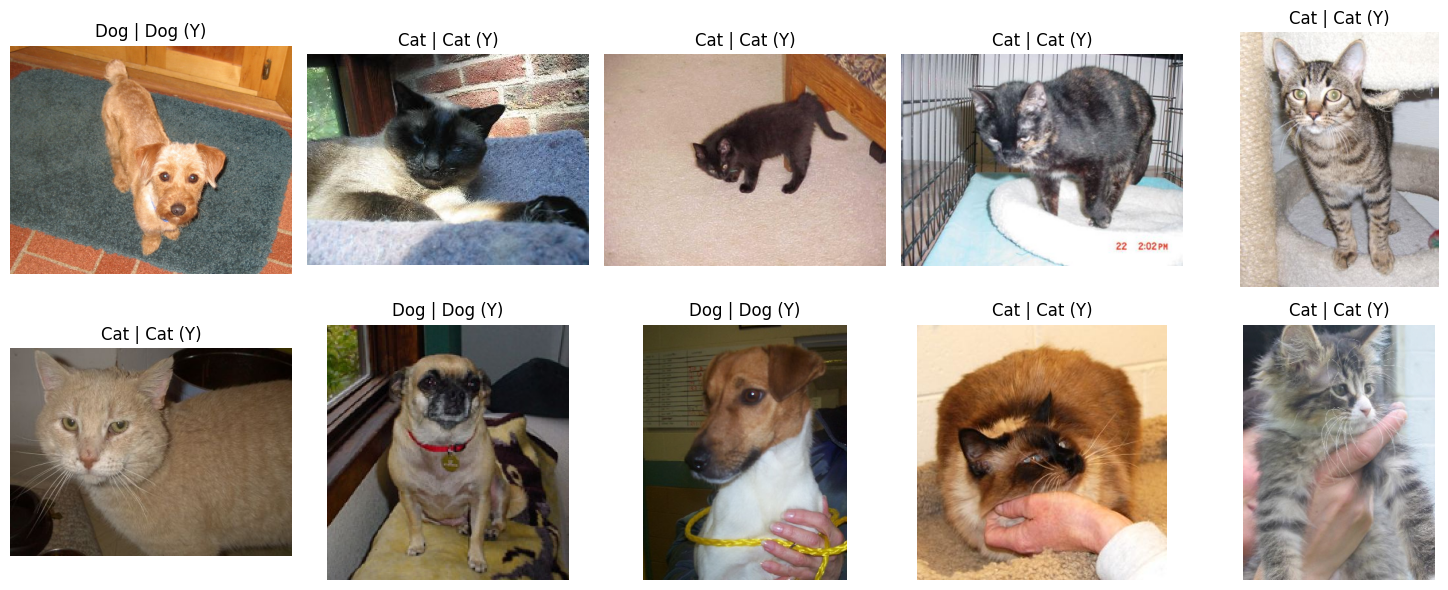

Показано 10 изображений; корректных = 10; accuracy_on_shown = 1.000
Confusion matrix (val) summary:
[[789   5]
 [ 13 793]]
Top confusions (count, true -> pred):
13 Dog -> Cat
5 Cat -> Dog


In [16]:
import random
import math
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Собираем предсказания, если их нет
if 'val_preds' not in globals() or 'val_targets' not in globals():
    print('val_preds/val_targets не найдены — собираю предсказания (использую get_preds_probs_fast если доступно)')
    try:
        maxb = METRICS_MAX_BATCHES if 'METRICS_MAX_BATCHES' in globals() else None
        val_preds, val_targets, val_probs = get_preds_probs_fast(model, val_loader, device, max_batches=maxb)
    except Exception as e:
        print('Не удалось автоматически собрать предсказания:', e)
        val_preds, val_targets = None, None

# Получаем пути для визуализации
paths = None
if 'val_paths' in globals():
    paths = val_paths
elif 'val_ds' in globals() and hasattr(val_ds, 'paths'):
    paths = val_ds.paths
elif 'val_loader' in globals():
    try:
        ds = val_loader.dataset
        paths = getattr(ds, 'paths', None)
    except Exception:
        paths = None

if paths is None:
    print('Не удалось получить пути к изображениям в валидации — проверьте переменные val_paths/val_ds/val_loader')
else:
    total = len(paths)
    n_show = min(10, total)
    # выбираем случайные индексы для отображения, чтобы получить разнообразие
    sel_idx = random.sample(range(total), k=n_show)
    cols = 5
    rows = math.ceil(len(sel_idx)/cols)
    plt.figure(figsize=(cols*3, rows*3))
    shown = 0
    correct = 0
    for i, idx in enumerate(sel_idx):
        p = paths[idx]
        try:
            img = Image.open(p).convert('RGB')
        except Exception as e:
            print('Не удалось открыть', p, e)
            continue
        # Получаем true и pred: если предсказания есть, используем их, иначе пробуем через модель
        true = None
        pred = None
        if isinstance(val_targets, (list, np.ndarray)) and idx < len(val_targets):
            true = int(val_targets[idx])
        if isinstance(val_preds, (list, np.ndarray)) and idx < len(val_preds):
            pred = int(val_preds[idx])
        if pred is None:
            # пробуем спрогнозировать одним изображением
            try:
                x = val_transform(img).unsqueeze(0).to(device)
                with torch.no_grad():
                    out = model(x)
                    pred = int(out.argmax(dim=1).cpu().numpy()[0])
            except Exception as e:
                pred = None
        if true is None:
            # попытка восстановить true метку из val_ds (если доступно)
            try:
                if 'val_ds' in globals() and hasattr(val_ds, 'labels'):
                    true = int(val_ds.labels[idx])
            except Exception:
                true = None
        pred_name = full_dataset.classes[pred] if (pred is not None and 'full_dataset' in globals()) else str(pred)
        true_name = full_dataset.classes[true] if (true is not None and 'full_dataset' in globals()) else str(true)
        ok = (pred is not None and true is not None and pred == true)
        if ok:
            correct += 1
        shown += 1
        plt.subplot(rows, cols, i+1)
        plt.imshow(img)
        plt.axis('off')
        mark = 'Y' if ok else 'N'
        plt.title(f'{pred_name} | {true_name} ({mark})')
    plt.tight_layout()
    plt.show()
    if shown>0:
        print(f'Показано {shown} изображений; корректных = {correct}; accuracy_on_shown = {correct/shown:.3f}')
    else:
        print('Нет показанных изображений')
    # Если есть полные предсказания/таргеты — покажем топ ошибок из confusion matrix
    try:
        if (isinstance(val_preds, (list, np.ndarray)) and isinstance(val_targets, (list, np.ndarray))):
            cm = confusion_matrix(val_targets, val_preds)
            print('Confusion matrix (val) summary:')
            print(cm)
            # топ off-diagonal ошибок
            pairs = []
            for ii in range(cm.shape[0]):
                for jj in range(cm.shape[1]):
                    if ii!=jj and cm[ii,jj]>0:
                        name_i = full_dataset.classes[ii] if 'full_dataset' in globals() else str(ii)
                        name_j = full_dataset.classes[jj] if 'full_dataset' in globals() else str(jj)
                        pairs.append((int(cm[ii,jj]), name_i, name_j))
            pairs.sort(reverse=True)
            if pairs:
                print('Top confusions (count, true -> pred):')
                for c,t,p in pairs[:10]:
                    print(c, t, '->', p)
    except Exception as e:
        print('Не удалось вывести summary confusion matrix:', e)